# IMPORTS

In [1]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from string import digits
import numpy as np
import requests

In [2]:
def get_html_from_link(page_link):
    '''
        Get HTML from web page and parse it.

        :param page_link: link of the webpage we want to scrap
        :type page_link: string
        :return: BeautifulSoup object (HTML parsed)
        :rtype: bs4.BeautifulSoup
    '''
    response = requests.get(page_link)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

In [3]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
html = get_html_from_link(url)

In [4]:
wd = webdriver.Safari()
time.sleep(3)
wd.close()

In [5]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
driver = webdriver.Safari()

driver.get(url)
time.sleep(3)
html = driver.page_source
driver.close()

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [7]:
movies_links = []
for element in soup.find_all('a'):
    ref = element.get("href")
    if ref == None:
        print(None)
    elif '/title/' in ref:
        movies_links.append(ref)
print(movies_links)

p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_195', '/title/tt0264464/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_195', '/title/tt1950186/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_196', '/title/tt1950186/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_196', '/title/tt0892769/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_197', '/title/tt0892769/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=XKMJF5KTQPYYAEQVSPWM&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_

In [8]:
def collecte_rating(soup):
    
    '''
        Get the ratings of the movies in the soup

        :param soup:
        :type: soup: bs4.BeautifulSoup
        :return: df_rating: a dataframe with the ratings in it
        :rtype: pd.DataFrame
    '''
    
    movies_rating = []
    for element in soup.find_all('td', {"class" : "ratingColumn imdbRating"}):
        movies_rating.append(element.text)

    df_rating = pd.DataFrame({"movies_ratings" : movies_rating})
    df_rating = df_rating.replace('\n','', regex=True)
    return df_rating

In [9]:
df_rating = collecte_rating(soup)

In [10]:
df_rating

,movies_ratings
0,"9,2"
1,"9,1"
2,"9,0"
3,"9,0"
4,"8,9"
...,...
245,"8,0"
246,"8,0"
247,"8,0"
248,"8,0"


In [11]:
def collecte_titles_links(soup):
    
    '''
        Get the links and titles of the movies in the soup

        :param soup:
        :type: soup: bs4.BeautifulSoup
        :return: df_rating: a dataframe with the titles and link in it
        :rtype: pd.DataFrame
    '''  
    
    url = "https://www.imdb.com/"
    movies_titles = []
    movies_links = []
    for element in soup.find_all('a'):
        ref = element.get("href")
        if ref == None:
            print(None)
        elif '/title/' in ref:
            movies_titles.append(element.text)
            movies_links.append(url+ref)

    movies_titles = [np.nan if x == ' \n' else x for x in movies_titles]

    df_titles = pd.DataFrame({"movies_titles": movies_titles, "movies_links": movies_links})
    df_titles = df_titles.dropna().reset_index()
    df_titles = df_titles.drop([0], axis=0)
    df_titles = df_titles.drop("index", axis = 1)

    return df_titles

In [12]:
df_titles = collecte_titles_links(soup)

None
None
None
None
None
None
None
None
None
None
None
None


In [13]:
df_titles

,movies_titles,movies_links
1,Les évadés,https://www.imdb.com//title/tt0111161/?pf_rd_m...
2,Le parrain,https://www.imdb.com//title/tt0068646/?pf_rd_m...
3,"Le parrain, 2ème partie",https://www.imdb.com//title/tt0071562/?pf_rd_m...
4,The Dark Knight: Le chevalier noir,https://www.imdb.com//title/tt0468569/?pf_rd_m...
5,12 hommes en colère,https://www.imdb.com//title/tt0050083/?pf_rd_m...
...,...,...
246,Munna Bhai M.B.B.S.,https://www.imdb.com//title/tt0374887/?pf_rd_m...
247,Neon Genesis Evangelion: The End of Evangelion,https://www.imdb.com//title/tt0169858/?pf_rd_m...
248,"Swades: Nous, le peuple",https://www.imdb.com//title/tt0367110/?pf_rd_m...
249,Aladdin,https://www.imdb.com//title/tt0103639/?pf_rd_m...


In [12]:
def extract_movie_info(movie_html):
    '''
        Extract movie infos from HTML

        :param movie_html: BeautifulSoup Element that contains book infos
        :type movie_html: bs4.element.Tag
        :return: df: Dict with mains infos in it
        :rtype: df: Dict
    '''

    # TODO : get book_title, book_rating and book_author from book_html and return this tuple
    infos = [k.text for k in movie_html.find_all('div', {'class' : 'credit_summary_item'})]
    titles = movie_html.find('h1').text

    df = {"directeur":infos[0].split("\n")[2].split(','),
          "scenaristes":infos[1].split("\n")[2].split(','),
          "vedettes":infos[2].split("\n")[2].split(','),
          "titres" : titles}


    return df

In [13]:
def extract_budget(movie_html):
    '''
        Extract movie budget from HTML

        :param movie_html: BeautifulSoup Element that contains book infos
        :type movie_html: bs4.element.Tag
        :return: df: int with budget in it
        :rtype: df: int
    '''
    
    budget = 0
    for div in movie_html.find_all('div', {'class' : 'txt-block'}):
        
        if 'Budget' in  div.text:
            budget = int(''.join([a for a in div.text.strip() if a.isdigit()]))

    return(budget)

In [14]:
def extract_country(movie_html):
    '''
        Extract country from HTML

        :param movie_html: BeautifulSoup Element that contains book infos
        :type movie_html: bs4.element.Tag
        :return: df: List with countries in it
        :rtype: df: List<string>
    '''
    country=[]
    for link in movie_html.find_all("a"):
        try:
            if 'country_of_origin' in  link["href"]:
                country.append(link.text)
        except KeyError:
            pass
    return(country)

In [15]:
def extract_synopsis(movie_html):
    '''
        Extract synopsis from HTML

        :param movie_html: BeautifulSoup Element that contains book infos
        :type movie_html: bs4.element.Tag
        :return: synospis: string with synopsis in it
        :rtype: synopsis: string
    '''
    link = movie_html.find("div", {"class": "inline canwrap"})
    synopsis = link.find('span').text.strip()
    return(synopsis)

In [25]:
extract_synopsis(df_titles.loc[:10])

C:\Users\Luigy\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,movies_titles,movies_links,synopsis
1,2,Les évadés,https://www.imdb.com//title/tt0111161/?pf_rd_m...,Chronicles the experiences of a formerly succe...
2,4,Le parrain,https://www.imdb.com//title/tt0068646/?pf_rd_m...,"The Godfather ""Don"" Vito Corleone is the head ..."
3,6,"Le parrain, 2ème partie",https://www.imdb.com//title/tt0071562/?pf_rd_m...,The continuing saga of the Corleone crime fami...
4,8,The Dark Knight: Le chevalier noir,https://www.imdb.com//title/tt0468569/?pf_rd_m...,Set within a year after the events of Batman B...
5,10,12 hommes en colère,https://www.imdb.com//title/tt0050083/?pf_rd_m...,The defense and the prosecution have rested an...
6,12,La liste de Schindler,https://www.imdb.com//title/tt0108052/?pf_rd_m...,Oskar Schindler is a vain and greedy German bu...
7,14,Le seigneur des anneaux: Le retour du roi,https://www.imdb.com//title/tt0167260/?pf_rd_m...,The final confrontation between the forces of ...
8,16,Pulp Fiction,https://www.imdb.com//title/tt0110912/?pf_rd_m...,Jules Winnfield (Samuel L. Jackson) and Vincen...
9,18,"Le bon, la brute et le truand",https://www.imdb.com//title/tt0060196/?pf_rd_m...,Blondie (The Good) (Clint Eastwood) is a profe...
10,20,Le seigneur des anneaux: La communauté de l'an...,https://www.imdb.com//title/tt0120737/?pf_rd_m...,An ancient Ring thought lost for centuries has...


In [16]:
def extract_all_infos(df):
    
    '''
        Extractall infos with a dataframe with links in it

        :param df: datafralme with all the url of the film we want infos
        :type df: pd.DataFrame
        :return: df: DataFrame with all the infos asked
        :rtype: df: pd.DataFrame
    '''
    
    budget=[]
    synopsis=[]
    country=[]
    directeur = []
    scenaristes = []
    vedettes = []
    titres = []
    
    for url in df["movies_links"]:
        movie_html = get_html_from_link(url)
        
        budget.append(extract_budget(movie_html))
        synopsis.append(extract_synopsis(movie_html))
        country.append(extract_country(movie_html))
        infos = extract_movie_info(movie_html)
        directeur.append(infos["directeur"])
        scenaristes.append(infos["scenaristes"])
        vedettes.append(infos["vedettes"])
        titres.append(infos["vedettes"])
    df["budget"]=budget
    df["synopsis"]=synopsis
    df["country"]=country
    df["directeur"] = directeur
    df["scenaristes"] = scenaristes
    df["vedettes"] = vedettes
    df["titres"] = titres
    return(df)

In [17]:
df_titles = collecte_titles_links(soup)
print(df_titles)
X= extract_all_infos(df_titles)

y = collecte_rating(soup)
X,y

None
None
None
None
None
None
None
None
None
None
None
None
                                      movies_titles  \
1                                        Les évadés   
2                                        Le parrain   
3                           Le parrain, 2ème partie   
4                The Dark Knight: Le chevalier noir   
5                               12 hommes en colère   
..                                              ...   
246                             Munna Bhai M.B.B.S.   
247                        Le château de l'araignée   
248  Neon Genesis Evangelion: The End of Evangelion   
249                         Swades: Nous, le peuple   
250                                         Aladdin   

                                          movies_links  
1    https://www.imdb.com//title/tt0111161/?pf_rd_m...  
2    https://www.imdb.com//title/tt0068646/?pf_rd_m...  
3    https://www.imdb.com//title/tt0071562/?pf_rd_m...  
4    https://www.imdb.com//title/tt0468569/?pf_rd_m

(                                      movies_titles  \
 1                                        Les évadés   
 2                                        Le parrain   
 3                           Le parrain, 2ème partie   
 4                The Dark Knight: Le chevalier noir   
 5                               12 hommes en colère   
 ..                                              ...   
 246                             Munna Bhai M.B.B.S.   
 247                        Le château de l'araignée   
 248  Neon Genesis Evangelion: The End of Evangelion   
 249                         Swades: Nous, le peuple   
 250                                         Aladdin   
 
                                           movies_links     budget  \
 1    https://www.imdb.com//title/tt0111161/?pf_rd_m...   25000000   
 2    https://www.imdb.com//title/tt0068646/?pf_rd_m...    6000000   
 3    https://www.imdb.com//title/tt0071562/?pf_rd_m...   13000000   
 4    https://www.imdb.com//title/tt0468569/?p

In [18]:
X["rating"] = y

In [119]:
X

,movies_titles,movies_links,budget,synopsis,country,directeur,scenaristes,vedettes,titres,rating
1,Les évadés,https://www.imdb.com//title/tt0111161/?pf_rd_m...,25000000,Chronicles the experiences of a formerly succe...,[USA],[Frank Darabont ],"[Stephen King (short story ""Rita Hayworth and ...","[Tim Robbins, Morgan Freeman, Bob Gunton |]","[Tim Robbins, Morgan Freeman, Bob Gunton |]","9,1"
2,Le parrain,https://www.imdb.com//title/tt0068646/?pf_rd_m...,6000000,"The Godfather ""Don"" Vito Corleone is the head ...",[USA],[Francis Ford Coppola ],"[Mario Puzo (screenplay by), Francis Ford Cop...","[Marlon Brando, Al Pacino, James Caan |]","[Marlon Brando, Al Pacino, James Caan |]","9,0"
3,"Le parrain, 2ème partie",https://www.imdb.com//title/tt0071562/?pf_rd_m...,13000000,The continuing saga of the Corleone crime fami...,[USA],[Francis Ford Coppola ],"[Francis Ford Coppola (screenplay by), Mario ...","[Al Pacino, Robert De Niro, Robert Duvall |]","[Al Pacino, Robert De Niro, Robert Duvall |]","9,0"
4,The Dark Knight: Le chevalier noir,https://www.imdb.com//title/tt0468569/?pf_rd_m...,185000000,Set within a year after the events of Batman B...,"[USA, UK]",[Christopher Nolan ],"[Jonathan Nolan (screenplay), Christopher Nol...","[Christian Bale, Heath Ledger, Aaron Eckhart |]","[Christian Bale, Heath Ledger, Aaron Eckhart |]","8,9"
5,12 hommes en colère,https://www.imdb.com//title/tt0050083/?pf_rd_m...,350000,The defense and the prosecution have rested an...,[USA],[Sidney Lumet ],"[Reginald Rose (story), Reginald Rose (screen...","[Henry Fonda, Lee J. Cobb, Martin Balsam |]","[Henry Fonda, Lee J. Cobb, Martin Balsam |]","8,9"
...,...,...,...,...,...,...,...,...,...,...
246,Munna Bhai M.B.B.S.,https://www.imdb.com//title/tt0374887/?pf_rd_m...,0,In India gangsters are called Bhai (brothers)....,[India],[Rajkumar Hirani ],"[Vidhu Vinod Chopra (screenplay), Rajkumar Hi...","[Sanjay Dutt, Arshad Warsi, Gracy Singh |]","[Sanjay Dutt, Arshad Warsi, Gracy Singh |]","8,0"
247,Le château de l'araignée,https://www.imdb.com//title/tt0050613/?pf_rd_m...,0,After securing a major victory on the battlefi...,[Japan],[Akira Kurosawa ],"[Hideo Oguni (screenplay), Shinobu Hashimoto ...","[Toshirô Mifune, Minoru Chiaki, Isuzu Yamada |]","[Toshirô Mifune, Minoru Chiaki, Isuzu Yamada |]","8,0"
248,Neon Genesis Evangelion: The End of Evangelion,https://www.imdb.com//title/tt0169858/?pf_rd_m...,0,"After the defeat of the final Angel, Shinji Ik...",[Japan],"[Hideaki Anno, Kazuya Tsurumaki ]",[Hideaki Anno (screenplay) ],"[Megumi Ogata, Megumi Hayashibara, Yûko Miya...","[Megumi Ogata, Megumi Hayashibara, Yûko Miya...","8,0"
249,"Swades: Nous, le peuple",https://www.imdb.com//title/tt0367110/?pf_rd_m...,0,"Set in modern day India, Swades is a film that...",[India],[Ashutosh Gowariker ],"[M.G. Sathya (story), Ashutosh Gowariker (sto...","[Shah Rukh Khan, Gayatri Joshi, Kishori Ball...","[Shah Rukh Khan, Gayatri Joshi, Kishori Ball...","8,0"


In [127]:
X.to_csv("top_250.csv", index = True, header = True)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
import nltk
from string import digits
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillaumeboddaert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk_stopwords = set(nltk.corpus.stopwords.words("english"))
sklearn_stowords = set(ENGLISH_STOP_WORDS)
STOP_WORDS = nltk_stopwords.union(sklearn_stowords)

In [22]:
def remove_digits(text):
    remove_digits = str.maketrans('', '', digits)
    res = text.lower().translate(remove_digits)
    return res

In [23]:
stem = nltk.stem.snowball.EnglishStemmer()

In [24]:
def remove_tiny_words(text):
    new_text = ""
    for word in text.split():
        if len(word) > 2:
            new_text = new_text + " " + stem.stem(word)
    return new_text

In [25]:
def remove_digits_tiny(df):
    new_synopsis =[]
    acteurs_scenaristes_directeur=[]
    new_titre = []
    
    df = pd.concat([df, pd.get_dummies(df["vedettes"].apply(pd.Series).stack()).sum(level=0)], axis=1)
    df = pd.concat([df, pd.get_dummies(df["directeur"].apply(pd.Series).stack()).sum(level=0)], axis=1)
    df = pd.concat([df, pd.get_dummies(df["scenaristes"].apply(pd.Series).stack()).sum(level=0)], axis=1)
    df = pd.concat([df, pd.get_dummies(df["country"].apply(pd.Series).stack()).sum(level=0)], axis=1)
    
    for synopsis in df['synopsis']:
        new_synopsis.append(remove_tiny_words(remove_digits(synopsis)))
    for titre in df['movies_titles']:
        new_titre.append(remove_tiny_words(remove_digits(titre)))
    df["new_titre"] = new_titre
    df["new_synopsis"] = new_synopsis
    return(df)

In [26]:
new_X = remove_digits_tiny(X)
new_X[['new_synopsis', "new_titre"]]

,new_synopsis,new_titre
1,chronicl the experi former success banker pri...,les évadé
2,"the godfath ""don"" vito corleon the head the c...",parrain
3,the continu saga the corleon crime famili tel...,"parrain, ème parti"
4,set within year after the event batman begin ...,the dark knight: chevali noir
5,the defens and the prosecut have rest and the...,homm colèr
...,...,...
246,india gangster are call bhai (brothers). one ...,munna bhai m.b.b.s.
247,"after secur major victori the battlefield, ta...",château l'araigné
248,"after the defeat the final angel, shinji ikar...",neon genesi evangelion: the end evangelion
249,"set modern day india, swade film that tackl t...","swades: nous, peupl"


In [117]:
new_X

,movies_titles,movies_links,budget,synopsis,country,directeur,scenaristes,vedettes,titres,rating,...,"USA, UK, France","USA, UK, Germany","USA, UK, Italy","USA, UK, Japan, Germany","USA, UK, Japan, Hungary","USA, UK, Malta, Morocco",West Germany,Yugoslavia,new_titre,new_synopsis
0,Les évadés,https://www.imdb.com//title/tt0111161/?pf_rd_m...,25000000,Chronicles the experiences of a formerly succe...,[USA],[Frank Darabont ],"[Stephen King (short story ""Rita Hayworth and ...","[Tim Robbins, Morgan Freeman, Bob Gunton |]","[Tim Robbins, Morgan Freeman, Bob Gunton |]","9,1",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,les évadé,chronicl the experi former success banker pri...
1,Le parrain,https://www.imdb.com//title/tt0068646/?pf_rd_m...,6000000,"The Godfather ""Don"" Vito Corleone is the head ...",[USA],[Francis Ford Coppola ],"[Mario Puzo (screenplay by), Francis Ford Cop...","[Marlon Brando, Al Pacino, James Caan |]","[Marlon Brando, Al Pacino, James Caan |]","9,0",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,parrain,"the godfath ""don"" vito corleon the head the c..."
2,"Le parrain, 2ème partie",https://www.imdb.com//title/tt0071562/?pf_rd_m...,13000000,The continuing saga of the Corleone crime fami...,[USA],[Francis Ford Coppola ],"[Francis Ford Coppola (screenplay by), Mario ...","[Al Pacino, Robert De Niro, Robert Duvall |]","[Al Pacino, Robert De Niro, Robert Duvall |]","9,0",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"parrain, ème parti",the continu saga the corleon crime famili tel...
3,The Dark Knight: Le chevalier noir,https://www.imdb.com//title/tt0468569/?pf_rd_m...,185000000,Set within a year after the events of Batman B...,"[USA, UK]",[Christopher Nolan ],"[Jonathan Nolan (screenplay), Christopher Nol...","[Christian Bale, Heath Ledger, Aaron Eckhart |]","[Christian Bale, Heath Ledger, Aaron Eckhart |]","8,9",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the dark knight: chevali noir,set within year after the event batman begin ...
4,12 hommes en colère,https://www.imdb.com//title/tt0050083/?pf_rd_m...,350000,The defense and the prosecution have rested an...,[USA],[Sidney Lumet ],"[Reginald Rose (story), Reginald Rose (screen...","[Henry Fonda, Lee J. Cobb, Martin Balsam |]","[Henry Fonda, Lee J. Cobb, Martin Balsam |]","8,9",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,homm colèr,the defens and the prosecut have rest and the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Rudy,NaN,0,Rudy grew up in a steel mill town where most p...,USA,"['[""[\'David Anspaugh\']""]']",['Angelo Pizzo'],"['[""[\'Sean Astin\'""', ' "" \' Jon Favreau\'""',...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rudi,rudi grew steel mill town where most peopl en...
1046,L.A. 399,NaN,0,,USA,"['[""[\'\']""]']",['Charley Crow'],"['[""[\'Claudio Bergamin\'""', ' "" \' Tom Byron\...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,l.a.,
1047,Rebound: The Legend of Earl 'The Goat' Manigault,NaN,0,A dramatization of the life of Earl 'The Goat'...,USA,"['[""[\'Eriq La Salle\']""]']","['Alan Swyer', ' Larry Golin']","['[""[\'Don Cheadle\'""', ' "" \' James Earl Jone...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rebound: the legend earl the goat manigault,dramat the life earl the goat manigault (don ...
1048,Euro 400.000,NaN,0,,Belgium,"['[""[\'Dagmar Duportail\']""]']",[''],"['[""[\'Davy De Meyer\'""', ' "" \' Titus De Voog...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,euro,


In [28]:
cv = CountVectorizer(lowercase=True, 
                     stop_words=STOP_WORDS, 
                     ngram_range=(1, 2), 
                     max_features=2000)

In [29]:
cv.fit(new_X[["new_synopsis","new_titre"]])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after',
                            'afterwards', 'again', 'against', 'ain', 'all',
                            'almost', 'alone', 'along', 'already', 'also',
                            'although', 'always', 'am', 'among', 'amongst',
                            'amoungst', 'amount', 'an', 'and', 'another', 'any',
                            'anyhow', 'anyone', 'anything', 'anyway', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [30]:
X_vectorized = cv.transform(new_X["new_synopsis"])
X_vectorized = pd.DataFrame(X_vectorized.toarray(), 
                            columns=cv.get_feature_names())

X_vectorized = pd.concat([X_vectorized, new_X.drop(["synopsis",
                                                    "movies_titles",
                                                    "movies_links",
                                                    "country",
                                                    "directeur",
                                                    "scenaristes",
                                                    "vedettes",
                                                    "titres",
                                                    "new_titre",
                                                    "new_synopsis"], axis = 1)], axis=1).drop(["new_synopsis",
                                                                                               "new_titre"], axis =1)

X_vectorized

,budget,rating,Aamir Khan,Aaron Eckhart |,Adolphe Menjou |,Adèle Haenel,Akemi Yamaguchi |,Akira Ishihama,Akira Terao,Al Ernest Garcia |,...,South Africa,South Korea,Soviet Union,Spain,Sweden,Switzerland,Turkey,UK,USA,West Germany
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25000000.0,"9,1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6000000.0,"9,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13000000.0,"9,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,185000000.0,"8,9",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.0,"8,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,"8,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.0,"8,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,0.0,"8,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
term_frequency = X_vectorized.drop('budget', axis = 1).sum(axis=0).sort_values(ascending=False)

In [34]:
term_frequency.values

array([168.,  43.,  25., ...,   1.,   1.,   1.])

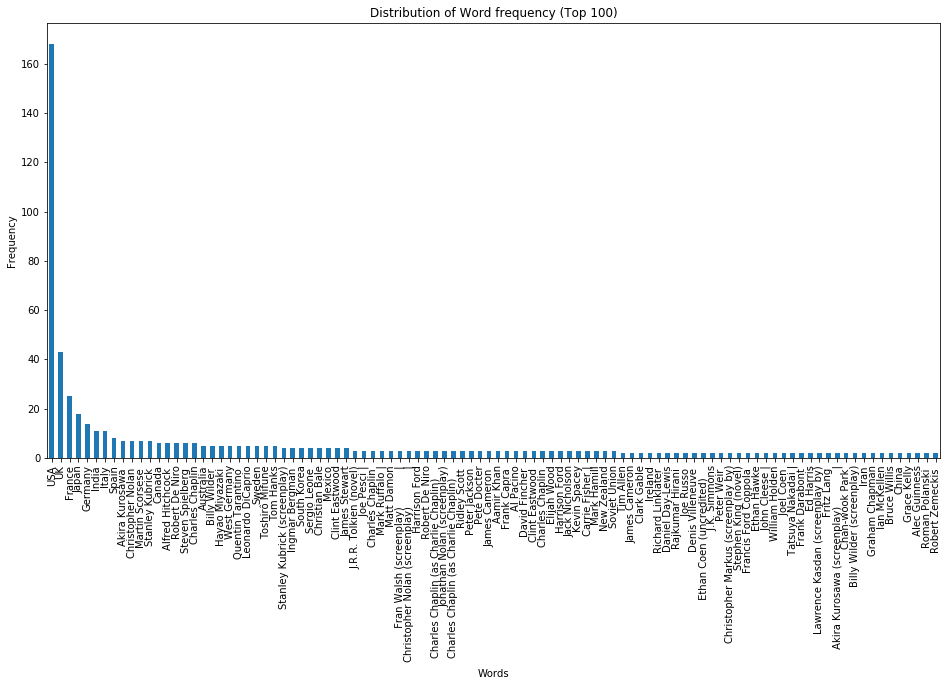

In [35]:

import matplotlib.pyplot as plt
term_frequency = X_vectorized.drop('budget', axis = 1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(16, 8))
term_frequency[:100].plot.bar()
plt.title("Distribution of Word frequency (Top 100)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

## IMPORT DONNEES SUPPLEMENTAIRES QUI NE SONT PAS DANS LE TOP RATING GRACE A UNE API

In [102]:
titles_api = []
for page_number in range(1,5):
    wd = webdriver.Safari()
    time.sleep(3)
    wd.close()

    url2 = f"https://m.imdb.com/list/ls009796553/?page={page_number}"
    driver = webdriver.Safari()

    driver.get(url2)
    time.sleep(3)
    html2 = driver.page_source
    driver.close()

    soup2 = BeautifulSoup(html2, 'html.parser')

    for element in soup2.find_all('span', {"class" : "h4"}):
        titles_api.append(element.text)

df_titles_api = pd.DataFrame({"movies_titles":titles_api})


In [103]:
df_titles_api

,movies_titles
0,1.
1,A Nightmare on Elm Street
2,2.
3,Awakenings
4,3.
...,...
795,Rudy
796,399.
797,Rebound: The Legend of Earl 'The Goat' Manigault
798,400.


In [120]:
def scrapping_from_api(df_titles_api):
    titles = []
    actors = []
    storylines = []
    directors = []
    ratings = []
    websites = []
    scenaristes = []
    pays = []
    box_offices = []
    for title in df_titles_api["movies_titles"]:
        #api_key = "9aa05c88"
        api_key = "5976a912"
        base_url = "http://www.omdbapi.com/?apikey=" + api_key
        final_url = base_url + "&t=" + title + "&plot=full"
        request = requests.get(final_url)
        data = request.json()

        try:
            titles.append(data["Title"])
            actors.append(data["Actors"])
            storylines.append(data["Plot"])
            directors.append(data["Director"])
            ratings.append(data["imdbRating"])
            scenaristes.append(data["Writer"])
            pays.append(data["Country"])
        except:
            titles.append(None)
            actors.append(None)
            storylines.append(None)
            directors.append(None)
            ratings.append(None)
            scenaristes.append(None)
            pays.append(None)
        try:
            box_offices.append(data["BoxOffice"])
        except : 
            box_offices.append(None)

    df_api = pd.DataFrame({"movies_titles" : titles, 
    "directeur": directors,
    "scenaristes" : scenaristes,
    "pays" :pays,
    "vedettes":actors, 
    "synopsis":storylines, 
    "notes" : ratings, 
    "budget": box_offices})

    return df_api

In [104]:
X2 = scrapping_from_api(df_titles_api)

In [105]:
X2

,movies_titles,directeur,scenaristes,pays,vedettes,synopsis,notes,budget
0,Evangelion: 1.0 You Are (Not) Alone,"Masayuki, Kazuya Tsurumaki, Hideaki Anno","Hideaki Anno (screenplay), Yoshiki Sakurai (sc...",Japan,"Megumi Ogata, Megumi Hayashibara, Kotono Mitsu...",The fate of the world is threatened by seeming...,7.7,N/A
1,A Nightmare on Elm Street,Wes Craven,Wes Craven,USA,"John Saxon, Ronee Blakley, Heather Langenkamp,...","On Elm Street, Nancy Thompson and a group of h...",7.5,N/A
2,Terminator 2: Judgment Day,James Cameron,"James Cameron, William Wisher",USA,"Arnold Schwarzenegger, Linda Hamilton, Edward ...",Over 10 years have passed since the first cybo...,8.5,"$198,116,802"
3,Awakenings,Penny Marshall,"Oliver Sacks (book), Steven Zaillian (screenplay)",USA,"Robert De Niro, Robin Williams, Julie Kavner, ...",1969. Dr. Malcolm Sayer is hired as a clinical...,7.8,N/A
4,Iron Man 3,Shane Black,"Drew Pearce (screenplay by), Shane Black (scre...",USA,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...","Marvel's ""Iron Man 3"" pits brash-but-brilliant...",7.2,"$408,992,272"
...,...,...,...,...,...,...,...,...
795,Rudy,David Anspaugh,Angelo Pizzo,USA,"Sean Astin, Jon Favreau, Ned Beatty, Greta Lind",Rudy grew up in a steel mill town where most p...,7.5,N/A
796,L.A. 399,N/A,Charley Crow,USA,"Claudio Bergamin, Tom Byron, Kelsey Heart, Ven...",N/A,6.6,N/A
797,Rebound: The Legend of Earl 'The Goat' Manigault,Eriq La Salle,"Alan Swyer, Larry Golin",USA,"Don Cheadle, James Earl Jones, Michael Beach, ...",A dramatization of the life of Earl 'The Goat'...,7.7,N/A
798,Euro 400.000,Dagmar Duportail,N/A,Belgium,"Davy De Meyer, Titus De Voogdt, Bram Stassyns,...",N/A,N/A,N/A


In [106]:
X2.to_csv("films_aleatoires.csv", index = True, header = True)

# IMPORTS FILMS PREDICTIONS

In [86]:
titles_predict = []

wd = webdriver.Safari()
time.sleep(3)
wd.close()
liste_pays = ["US", "GB", "JP", "IN", "FR", "DE"]
df_titles_predict = pd.DataFrame()

for pays in liste_pays:
    df_transition = pd.DataFrame()
    url_predict = f"https://www.imdb.com/calendar?region={pays}&ref_=rlm"
    driver = webdriver.Safari()

    driver.get(url_predict)
    time.sleep(3)
    html_predict = driver.page_source
    driver.close()

    soup_predict = BeautifulSoup(html_predict, 'html.parser')
    df_transition = collecte_titles_links(soup_predict)
    df_titles_predict = pd.concat([df_titles_predict, df_transition], ignore_index = True)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [87]:
df_titles_predict

,movies_titles,movies_links
0,Beats,https://www.imdb.com//title/tt7524414/?ref_=rlm
1,Relic,https://www.imdb.com//title/tt9072352/?ref_=rlm
2,John Lewis: Good Trouble,https://www.imdb.com//title/tt10310096/?ref_=rlm
3,Toothfairy 2,https://www.imdb.com//title/tt11082246/?ref_=rlm
4,Unhinged,https://www.imdb.com//title/tt10059518/?ref_=rlm
...,...,...
595,The Boss Baby 2,https://www.imdb.com//title/tt6932874/?ref_=rlm
596,F9,https://www.imdb.com//title/tt5433138/?ref_=rlm
597,Shang-Chi and the Legend of the Ten Rings,https://www.imdb.com//title/tt9376612/?ref_=rlm
598,Infinite,https://www.imdb.com//title/tt6654210/?ref_=rlm


In [90]:
df = scrapping_from_api(df_titles_api)

In [92]:
df_titles_predict.to_csv("movies_to_predict.csv", index= True, header=True)

# Predictions

In [252]:
df2 = pd.read_csv("films_aleatoires.csv")

In [253]:
df2

,Unnamed: 0,movies_titles,directeur,scenaristes,pays,vedettes,synopsis,notes,budget
0,0,Evangelion: 1.0 You Are (Not) Alone,"Masayuki, Kazuya Tsurumaki, Hideaki Anno","Hideaki Anno (screenplay), Yoshiki Sakurai (sc...",Japan,"Megumi Ogata, Megumi Hayashibara, Kotono Mitsu...",The fate of the world is threatened by seeming...,7.7,NaN
1,1,A Nightmare on Elm Street,Wes Craven,Wes Craven,USA,"John Saxon, Ronee Blakley, Heather Langenkamp,...","On Elm Street, Nancy Thompson and a group of h...",7.5,NaN
2,2,Terminator 2: Judgment Day,James Cameron,"James Cameron, William Wisher",USA,"Arnold Schwarzenegger, Linda Hamilton, Edward ...",Over 10 years have passed since the first cybo...,8.5,"$198,116,802"
3,3,Awakenings,Penny Marshall,"Oliver Sacks (book), Steven Zaillian (screenplay)",USA,"Robert De Niro, Robin Williams, Julie Kavner, ...",1969. Dr. Malcolm Sayer is hired as a clinical...,7.8,NaN
4,4,Iron Man 3,Shane Black,"Drew Pearce (screenplay by), Shane Black (scre...",USA,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...","Marvel's ""Iron Man 3"" pits brash-but-brilliant...",7.2,"$408,992,272"
...,...,...,...,...,...,...,...,...,...
795,795,Rudy,David Anspaugh,Angelo Pizzo,USA,"Sean Astin, Jon Favreau, Ned Beatty, Greta Lind",Rudy grew up in a steel mill town where most p...,7.5,NaN
796,796,L.A. 399,NaN,Charley Crow,USA,"Claudio Bergamin, Tom Byron, Kelsey Heart, Ven...",NaN,6.6,NaN
797,797,Rebound: The Legend of Earl 'The Goat' Manigault,Eriq La Salle,"Alan Swyer, Larry Golin",USA,"Don Cheadle, James Earl Jones, Michael Beach, ...",A dramatization of the life of Earl 'The Goat'...,7.7,NaN
798,798,Euro 400.000,Dagmar Duportail,NaN,Belgium,"Davy De Meyer, Titus De Voogdt, Bram Stassyns,...",NaN,NaN,NaN


In [254]:
directeur = []
vedettes = []
scenaristes = []

df2['budget'] = df2['budget'].fillna(0)
df2['synopsis'] = df2['synopsis'].fillna("")
df2['directeur'] = df2['directeur'].fillna("")
df2['vedettes'] = df2['vedettes'].fillna("")
df2['scenaristes'] = df2['scenaristes'].fillna("")
df2['movies_titles'] = df2['movies_titles'].fillna("")
for k in range(df2.shape[0]):
    try: 
        if  "$" in df2.loc[k, "budget"]:
            df2.loc[k, "budget"] =  int(str(df2.loc[k, "budget"]).strip("$").replace(',', ''))
    except TypeError:
        pass
    directeur.append(str(df2.loc[k, "directeur"].split(",")))
    vedettes.append(str(df2.loc[k, "vedettes"].split(",")))
    scenaristes.append(str(df2.loc[k, "scenaristes"].split(",")))
df2["directeur"] = directeur
df2["vedettes"] = vedettes
df2["scenaristes"] = scenaristes

df2

,Unnamed: 0,movies_titles,directeur,scenaristes,pays,vedettes,synopsis,notes,budget
0,0,Evangelion: 1.0 You Are (Not) Alone,"['Masayuki', ' Kazuya Tsurumaki', ' Hideaki An...","['Hideaki Anno (screenplay)', ' Yoshiki Sakura...",Japan,"['Megumi Ogata', ' Megumi Hayashibara', ' Koto...",The fate of the world is threatened by seeming...,7.7,0
1,1,A Nightmare on Elm Street,['Wes Craven'],['Wes Craven'],USA,"['John Saxon', ' Ronee Blakley', ' Heather Lan...","On Elm Street, Nancy Thompson and a group of h...",7.5,0
2,2,Terminator 2: Judgment Day,['James Cameron'],"['James Cameron', ' William Wisher']",USA,"['Arnold Schwarzenegger', ' Linda Hamilton', '...",Over 10 years have passed since the first cybo...,8.5,198116802
3,3,Awakenings,['Penny Marshall'],"['Oliver Sacks (book)', ' Steven Zaillian (scr...",USA,"['Robert De Niro', ' Robin Williams', ' Julie ...",1969. Dr. Malcolm Sayer is hired as a clinical...,7.8,0
4,4,Iron Man 3,['Shane Black'],"['Drew Pearce (screenplay by)', ' Shane Black ...",USA,"['Robert Downey Jr.', ' Gwyneth Paltrow', ' Do...","Marvel's ""Iron Man 3"" pits brash-but-brilliant...",7.2,408992272
...,...,...,...,...,...,...,...,...,...
795,795,Rudy,['David Anspaugh'],['Angelo Pizzo'],USA,"['Sean Astin', ' Jon Favreau', ' Ned Beatty', ...",Rudy grew up in a steel mill town where most p...,7.5,0
796,796,L.A. 399,[''],['Charley Crow'],USA,"['Claudio Bergamin', ' Tom Byron', ' Kelsey He...",,6.6,0
797,797,Rebound: The Legend of Earl 'The Goat' Manigault,['Eriq La Salle'],"['Alan Swyer', ' Larry Golin']",USA,"['Don Cheadle', ' James Earl Jones', ' Michael...",A dramatization of the life of Earl 'The Goat'...,7.7,0
798,798,Euro 400.000,['Dagmar Duportail'],[''],Belgium,"['Davy De Meyer', ' Titus De Voogdt', ' Bram S...",,NaN,0


In [255]:
X2 = df2.drop("notes", axis = 1)
y2 = df2["notes"]
print(X2, y2)

Unnamed: 0                                     movies_titles  \
0             0               Evangelion: 1.0 You Are (Not) Alone   
1             1                         A Nightmare on Elm Street   
2             2                        Terminator 2: Judgment Day   
3             3                                        Awakenings   
4             4                                        Iron Man 3   
..          ...                                               ...   
795         795                                              Rudy   
796         796                                          L.A. 399   
797         797  Rebound: The Legend of Earl 'The Goat' Manigault   
798         798                                      Euro 400.000   
799         799                                    Romeo + Juliet   

                                             directeur  \
0    ['Masayuki', ' Kazuya Tsurumaki', ' Hideaki An...   
1                                       ['Wes Craven']   
2 

In [256]:
X2.columns= ['Unnamed: 0', 'movies_titles', 'directeur', 'scenaristes', 'country', 'vedettes', 'synopsis', 'budget']
X2.drop("Unnamed: 0", axis = 1)
new_X2 = remove_digits_tiny(X2)
new_X2[['new_synopsis', "new_titre"]]

,new_synopsis,new_titre
0,the fate the world threaten seem monstrous en...,evangelion: you are (not) alon
1,"elm street, nanci thompson and group her frie...",nightmar elm street
2,over year have pass sinc the first cyborg cal...,termin judgment day
3,dr. malcolm sayer hire clinic physician psych...,awaken
4,"marvel ""iron man pit brash-but-brilli industr...",iron man
...,...,...
795,rudi grew steel mill town where most peopl en...,rudi
796,,l.a.
797,dramat the life earl the goat manigault (don ...,rebound: the legend earl the goat manigault
798,,euro


In [257]:
X3 = pd.concat([X, X2], ignore_index = True)
new_X = remove_digits_tiny(X3)
y2= y2.fillna(5)
y3 = pd.DataFrame([{"movies_ratings": k} for k in y2])
print(y3)
new_y = pd.concat([y, y3], ignore_index = True)
print(new_X, new_y)

movies_ratings
0               7.7
1               7.5
2               8.5
3               7.8
4               7.2
..              ...
795             7.5
796             6.6
797             7.7
798             5.0
799             6.7

[800 rows x 1 columns]
                                         movies_titles  \
0                                           Les évadés   
1                                           Le parrain   
2                              Le parrain, 2ème partie   
3                   The Dark Knight: Le chevalier noir   
4                                  12 hommes en colère   
...                                                ...   
1045                                              Rudy   
1046                                          L.A. 399   
1047  Rebound: The Legend of Earl 'The Goat' Manigault   
1048                                      Euro 400.000   
1049                                    Romeo + Juliet   

                                           m

In [258]:
cv = CountVectorizer(lowercase=True, 
                     stop_words=STOP_WORDS, 
                     ngram_range=(1, 2), 
                     max_features=10000)

In [259]:
print(new_X["new_synopsis"])
cv.fit(new_X["new_synopsis"])

0        chronicl the experi former success banker pri...
1        the godfath "don" vito corleon the head the c...
2        the continu saga the corleon crime famili tel...
3        set within year after the event batman begin ...
4        the defens and the prosecut have rest and the...
                              ...                        
1045     rudi grew steel mill town where most peopl en...
1046                                                     
1047     dramat the life earl the goat manigault (don ...
1048                                                     
1049     the classic stori romeo and juliet, set moder...
Name: new_synopsis, Length: 1050, dtype: object


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after',
                            'afterwards', 'again', 'against', 'ain', 'all',
                            'almost', 'alone', 'along', 'already', 'also',
                            'although', 'always', 'am', 'among', 'amongst',
                            'amoungst', 'amount', 'an', 'and', 'another', 'any',
                            'anyhow', 'anyone', 'anything', 'anyway', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [260]:
X_vectorized = cv.transform(new_X["new_synopsis"])
X_vectorized = pd.DataFrame(X_vectorized.toarray(), 
                            columns=cv.get_feature_names())
print(X_vectorized)

#X_vectorized = pd.concat([X_vectorized, new_X.drop(["synopsis",
                                                    #"movies_titles",
                                                    #"movies_links",
                                                    #"country",
                                                    #"directeur",
                                                    #"scenaristes",
                                                    #"vedettes",
                                                    #"titres"], axis = 1)], axis=1).drop(["new_synopsis",
                                                                                               #"new_titre", "Unnamed: 0"], axis =1)

X_vectorized

aaron  abagnal  abagnal jr  abandon  abandon possessions  abberlin  \
0         0        0           0        0                    0         0   
1         0        0           0        0                    0         0   
2         0        0           0        0                    0         0   
3         0        0           0        0                    0         0   
4         0        0           0        0                    0         0   
...     ...      ...         ...      ...                  ...       ...   
1045      0        0           0        0                    0         0   
1046      0        0           0        0                    0         0   
1047      0        0           0        0                    0         0   
1048      0        0           0        0                    0         0   
1049      0        0           0        0                    0         0   

      abberlin becom  abberline  abberline brilliant  abberline mary  ...  \
0               

,aaron,abagnal,abagnal jr,abandon,abandon possessions,abberlin,abberlin becom,abberline,abberline brilliant,abberline mary,...,youthful fall,zafranov,zahra,zain,zao,zee,zero,zhen,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
X_vectorized.to_csv("features_X_vectorized_synopsis.csv")
#new_y.to_csv("label_y.csv")

In [262]:
X_vectorized = pd.read_csv("features_X_vectorized_synopsis.csv", index_col = 0)
new_y = pd.read_csv("label_y.csv", index_col = 0)

In [267]:
print(new_y)
new_y["movies_ratings"] = new_y["movies_ratings"].fillna(5)

for k in range(new_y.shape[0]):
    new_y.loc[k, "movies_ratings"] = new_y.loc[k, "movies_ratings"].replace(",", ".")

print(X_vectorized)
print(new_y)

movies_ratings
0               9,2
1               9,1
2               9,0
3               9,0
4               8,9
...             ...
1045            7.5
1046            6.6
1047            7.7
1048            5.0
1049            6.7

[1050 rows x 1 columns]
      aaron  abagnal  abagnal jr  abandon  abandon possessions  abberlin  \
0         0        0           0        0                    0         0   
1         0        0           0        0                    0         0   
2         0        0           0        0                    0         0   
3         0        0           0        0                    0         0   
4         0        0           0        0                    0         0   
...     ...      ...         ...      ...                  ...       ...   
1045      0        0           0        0                    0         0   
1046      0        0           0        0                    0         0   
1047      0        0           0        0               

In [268]:
X_vectorized = X_vectorized.fillna(0)
new_y = new_y.fillna(5)

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split( X_vectorized, new_y,
                                                    test_size=0.2,
                                                    random_state=14)

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000)

sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

-0.05680424565551534

In [269]:
but = pd.read_csv("movies_to_predict.csv", index_col = 0)
but = but.drop("notes", axis = 1)
directeur = []
vedettes = []
scenaristes = []

but['budget'] = but['budget'].fillna(0)
but['synopsis'] = but['synopsis'].fillna("")
but['directeur'] = but['directeur'].fillna("")
but['vedettes'] = but['vedettes'].fillna("")
but['scenaristes'] = but['scenaristes'].fillna("")
but['movies_titles'] = but['movies_titles'].fillna("")
for k in range(but.shape[0]):
    try: 
        if  "$" in but.loc[k, "budget"]:
            but.loc[k, "budget"] =  int(str(but.loc[k, "budget"]).strip("$").replace(',', ''))
    except TypeError:
        pass
    directeur.append(str(but.loc[k, "directeur"].split(",")))
    vedettes.append(str(but.loc[k, "vedettes"].split(",")))
    scenaristes.append(str(but.loc[k, "scenaristes"].split(",")))
but["directeur"] = directeur
but["vedettes"] = vedettes
but["scenaristes"] = scenaristes


but.columns = ['movies_titles', 'directeur', 'scenaristes', 'country', 'vedettes', 'synopsis', 'budget']



new_but = remove_digits_tiny(but)

but_vectorized = cv.transform(new_but["new_synopsis"])
print(but_vectorized.toarray())
but_vectorized = pd.DataFrame(but_vectorized.toarray(), 
                            columns=cv.get_feature_names())
#but_vectorized = pd.concat([but_vectorized, new_but.drop(["synopsis",
                                                    #"movies_titles",
                                                    #"country",
                                                    #"directeur",
                                                    #"scenaristes",
                                                    #"vedettes",
                                                    #"new_titre",
                                                    #"new_synopsis"], axis = 1)], axis=1)


#for k in X_vectorized.columns:
    #if k not in but_vectorized.columns:
        #but_vectorized[k] = [0 for k in range(but_vectorized.shape[0])]

#print(X_vectorized)
        
#for k in but_vectorized.columns:
    #if k not in X_vectorized.columns:
        #but_vectorized = but_vectorized.drop(k, axis = 1)
        
but_vectorized = but_vectorized.fillna(0)
print(but_vectorized)
prediction = sgd.predict(but_vectorized)
prediction

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
     aaron  abagnal  abagnal jr  abandon  abandon possessions  abberlin  \
0        0        0           0        0                    0         0   
1        0        0           0        0                    0         0   
2        0        0           0        0                    0         0   
3        0        0           0        0                    0         0   
4        0        0           0        0                    0         0   
..     ...      ...         ...      ...                  ...       ...   
595      0        0           0        0                    0         0   
596      0        0           0        0                    0         0   
597      0        0           0        0                    0         0   
598      0        0           0        0                    0         0   
599      0        0           0        0               

array([ 5.83888699,  5.68630397,  6.5931125 ,  6.84797401,  6.561188  ,
        6.14319538,  5.36018337,  5.68444985,  7.81926041,  5.93665699,
        5.73840946,  6.51237105,  5.73840946, 10.11285769,  6.62810333,
        6.1630915 ,  5.63343112,  5.73840946,  7.82897445,  6.1705271 ,
        5.6611729 ,  5.93736194,  6.10549231,  5.8730274 ,  5.59900146,
        6.73012831,  6.61259852,  6.24829702,  6.52117069,  6.47787679,
        5.86443339,  6.27088053,  6.79415116,  5.66841691,  5.92220078,
        5.91331171,  6.41016606,  6.13205112,  6.19126208,  5.73840946,
        5.72637415,  5.82920595,  6.49678205,  6.27298974,  5.76274613,
        6.68002791,  6.0494651 ,  5.88107182,  5.64155345,  6.1439158 ,
        7.08731147,  6.38077562,  6.56103174,  6.04400575,  5.98700422,
        5.73840946,  5.981496  ,  7.17262771,  5.85420026,  6.05454622,
        6.40977216,  6.02995716,  6.42786362,  8.94763117,  5.80410448,
        6.42178106,  6.20987927,  6.11782323,  5.89222475,  5.82

In [266]:
pd.DataFrame(data = prediction, columns = ["note_predites"]).to_csv("prediction.csv")

NameError: name 'prediction' is not defined